# HOMEWORK 5

In this homework you are going to implement the **Floyd-Steinberg dithering** algorithm. Dithering, in general, means that we are adding noise to the signal (in our case digital image) in order to perceive it better. In other words, by adding the noise the objective quality will be worse but the subjective quality will be better (i.e. the image will "look" better).

The details of FS dithering can be found in this [wiki](https://en.wikipedia.org/wiki/Floyd%E2%80%93Steinberg_dithering) page. In order to implement the dithering, we will implement the following steps:
* Define colour pallette
* Quantize the image to obtain the baseline and compute the average quantization error
* Implement FS dithering and compute the average quantization error

You will also have to answer the question at the end of this notebook.

Note: In this homework, you will have the chance to earn some extra points. See the "Bonus" section at the end of the notebook. Good luck!

As always, you are encouraged to use your own images :-)

In [70]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

Let's load the image.

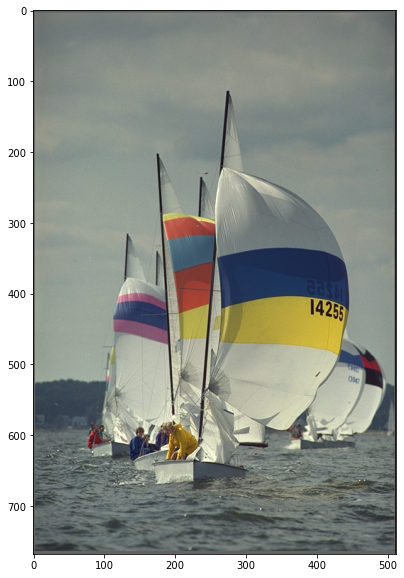

In [95]:
# Load image
img = cv2.imread('data/kodim09.png')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB);
# Plot it
plt.imshow(img)


Let's start with gray tones first.

In [96]:
# Black, dark gray, light gray, white
colors = np.array([[0, 0, 0],
                   [64, 64, 64],
                   [192, 192, 192],
                   [255, 255, 255]])

Using the colour pallette, let's quantize the original image.

In [97]:
from tqdm import tqdm
# Cast the image to float
#img = img/255;

# Prepare for quantization

rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in tqdm(range(rows)):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r,c];
        
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        new_pixel = colors[0];
        min_distance = 255;
        for color in colors:
            distance = math.sqrt(math.pow((color[0]-pixel[0]),2) + math.pow((color[1]-pixel[1]),2) + math.pow((color[2]-pixel[2]),2));
            if distance<min_distance:
                                 min_distance = distance;
                                 new_pixel = color;

        # Apply quantization
        quantized[r, c, :] = new_pixel

100%|██████████| 768/768 [00:07<00:00, 97.44it/s] 


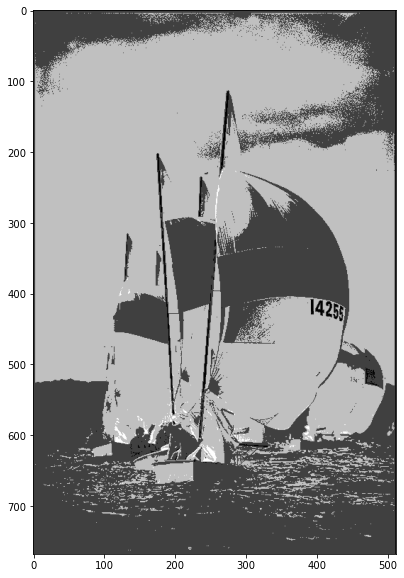

In [98]:
# Show quantized image (don't forget to cast back to uint8)
plt.imshow(quantized)

In [157]:
# Compute average quantization error
quantized_error = 0.0;
img_n = img/255;
quantized_n = quantized/255
for r in tqdm(range(rows)):
    for c in range(cols):
          quantized_error += math.sqrt(math.pow((img_n[r,c,0]-quantized_n[r,c,0]),2) + math.pow((img_n[r,c,1]-quantized_n[r,c,1]),2) + math.pow((img_n[r,c,2]-quantized_n[r,c,2]),2));

print("Quantization error: ", quantized_error/(rows*cols));


100%|██████████| 768/768 [00:01<00:00, 529.66it/s]

Quantization error:  0.2830404047564782


#### Floyd-Steinberg Dithering
We are now going to implement the FS dithering and compare it to the optimally quantized image we have calculated above.

In [113]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img)
dithering = np.zeros_like(img)

for r in tqdm(range(1, rows-1)):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = img_tmp[r,c];
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        new_pixel = colors[0];
        min_distance = 255;
        for color in colors:
            distance = math.sqrt(math.pow((color[0]-pixel[0]),2) + math.pow((color[1]-pixel[1]),2) + math.pow((color[2]-pixel[2]),2));
            if distance<min_distance:
                                 min_distance = distance;
                                 new_pixel = color;        
        
        # Compute quantization error
        quant_error = np.subtract(pixel, new_pixel);
        
        # Diffuse the quantization error accroding to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp[r+1,c] = [img_tmp[r+1,c,0]+quant_error[0]*7/16, img_tmp[r+1,c,1]+quant_error[1]*7/16, img_tmp[r+1,c,2]+quant_error[2]*7/16];
        img_tmp[r-1,c+1] = [img_tmp[r-1,c+1,0]+quant_error[0]*3/16, img_tmp[r-1,c+1,1]+quant_error[1]*3/16, img_tmp[r-1,c+1,2]+quant_error[2]*3/16]; 
        img_tmp[r,c+1] = [img_tmp[r,c+1,0]+quant_error[0]*5/16, img_tmp[r,c+1,1]+quant_error[1]*5/16, img_tmp[r,c+1,2]+quant_error[2]*5/16];
        img_tmp[r+1,c+1] = [img_tmp[r+1,c+1,0]+quant_error[0]*1/16, img_tmp[r+1,c+1,1]+quant_error[1]*1/16, img_tmp[r+1,c+1,2]+quant_error[2]*1/16];
        
        
        # Apply dithering
        dithering[r, c, :] = new_pixel

100%|██████████| 766/766 [00:37<00:00, 20.30it/s]


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x26ec4b5d0d0>)

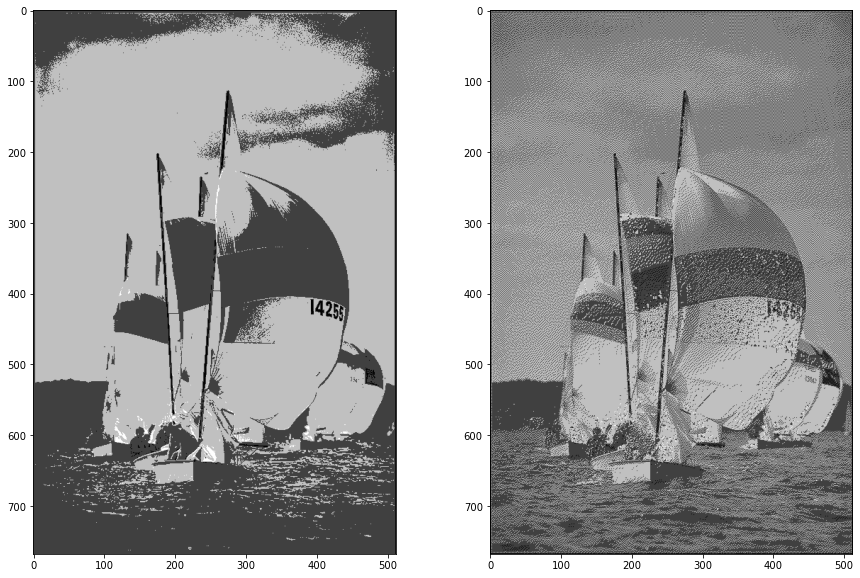

In [116]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized)   # optimally quantized
plt.subplot(122), plt.imshow(dithering)   # dithering

In [159]:
# Compute average quantization error for dithered image
img_n = img/255;
dithering_n = dithering/255
dithering_errors = 0.0
for r in tqdm(range(rows)):
    for c in range(cols):
          dithering_errors += math.sqrt(math.pow((img_n[r,c,0]-dithering_n[r,c,0]),2) + math.pow((img_n[r,c,1]-dithering_n[r,c,1]),2) + math.pow((img_n[r,c,2]-dithering_n[r,c,2]),2));

print("Quantization error: ", quantized_error/(rows*cols));
print("Dezering error: ", dithering_errors/(rows*cols));


100%|██████████| 768/768 [00:01<00:00, 489.81it/s]

Quantization error:  0.2830404047564782
Dezering error:  0.34707886422818257


### Questions
* Which image has higher quantization error? Optimally quantized or dithered?
* Which image looks better to you?
* Can you repeat the same process using only two colours: black and white? Show me :-)

1. The dithered image have bigger average error than quantized image. It's corect because we have apply the sintetic error to the dithered image.
2. Subjectively the dithered image looks better if we look on whole image. But some details (for example the number on the sail) is more noisily than on the quantized image. 
3. Yes, I can:). And as we can see the FS algoritm works realy good even in such a hopeless situation! 
 See below. 

100%|██████████| 766/766 [00:33<00:00, 23.05it/s]


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x26ec5732580>)

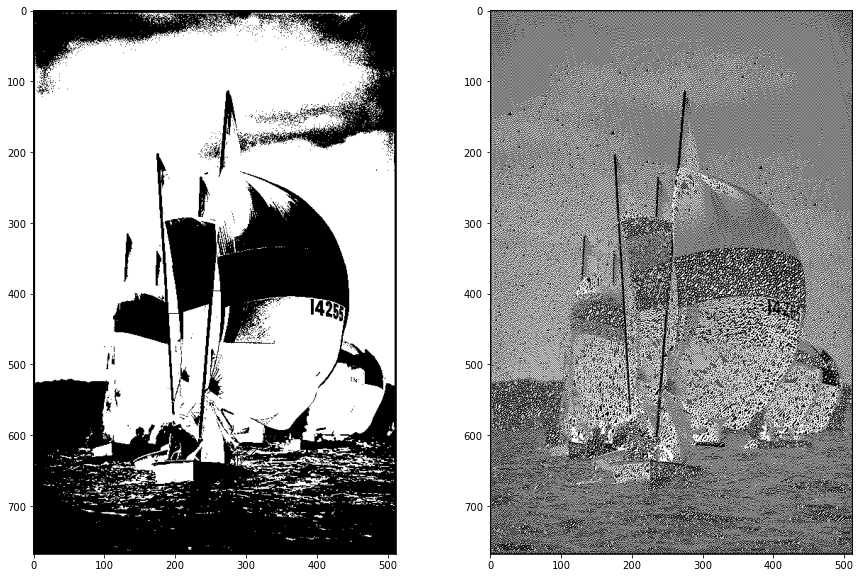

In [161]:
#3 Code
# Black @ white only 
colors = np.array([[0, 0, 0],
                   [255, 255, 255]])

# Apply quantization
for r in tqdm(range(rows)):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r,c];
        
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        new_pixel = colors[0];
        min_distance = 255;
        for color in colors:
            distance = math.sqrt(math.pow((color[0]-pixel[0]),2) + math.pow((color[1]-pixel[1]),2) + math.pow((color[2]-pixel[2]),2));
            if distance<min_distance:
                                 min_distance = distance;
                                 new_pixel = color;

        # Apply quantization
        quantized[r, c, :] = new_pixel

# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img)
dithering = np.zeros_like(img)

for r in tqdm(range(1, rows-1)):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = img_tmp[r,c];
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        new_pixel = colors[0];
        min_distance = 255;
        for color in colors:
            distance = math.sqrt(math.pow((color[0]-pixel[0]),2) + math.pow((color[1]-pixel[1]),2) + math.pow((color[2]-pixel[2]),2));
            if distance<min_distance:
                                 min_distance = distance;
                                 new_pixel = color;        
        
        # Compute quantization error
        quant_error = np.subtract(pixel, new_pixel);
        
        # Diffuse the quantization error accroding to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp[r+1,c] = [img_tmp[r+1,c,0]+quant_error[0]*7/16, img_tmp[r+1,c,1]+quant_error[1]*7/16, img_tmp[r+1,c,2]+quant_error[2]*7/16];
        img_tmp[r-1,c+1] = [img_tmp[r-1,c+1,0]+quant_error[0]*3/16, img_tmp[r-1,c+1,1]+quant_error[1]*3/16, img_tmp[r-1,c+1,2]+quant_error[2]*3/16]; 
        img_tmp[r,c+1] = [img_tmp[r,c+1,0]+quant_error[0]*5/16, img_tmp[r,c+1,1]+quant_error[1]*5/16, img_tmp[r,c+1,2]+quant_error[2]*5/16];
        img_tmp[r+1,c+1] = [img_tmp[r+1,c+1,0]+quant_error[0]*1/16, img_tmp[r+1,c+1,1]+quant_error[1]*1/16, img_tmp[r+1,c+1,2]+quant_error[2]*1/16];
        
        
        # Apply dithering
        dithering[r, c, :] = new_pixel
        


plt.subplot(121), plt.imshow(quantized)   # optimally quantized
plt.subplot(122), plt.imshow(dithering)   # dithering

### Bonus Points

Repeat the homework using a diffrerent image pallette. For instance, you can use an optimal colour
pallette that we can calculate via k-means algorithm. The following snippet of code will give you the 16
optimal colours for your original image.

In [207]:
from sklearn.cluster import KMeans


# Apply quantization
def Quantize(palette):

        quanted = np.zeros_like(img)
        for r in tqdm(range(rows)):
            for c in range(cols):
                # Extract the original pixel value
                pixel = img[r,c];

                # Find the closest colour from the pallette (using absolute value/Euclidean distance)
                # Note: You may need more than one line of code here
                new_pixel = palette[0];
                min_distance = 255;
                for color in palette:
                    distance = math.sqrt(math.pow((color[0]-pixel[0]),2) + math.pow((color[1]-pixel[1]),2) + math.pow((color[2]-pixel[2]),2));
                    if distance<min_distance:
                                         min_distance = distance;
                                         new_pixel = color;

                # Apply quantization
                quanted[r, c, :] = new_pixel
                
        return quanted;

                
def Dethering(palette):
        img_tmp = np.copy(img)
        dithered = np.zeros_like(img)
        #return dithered;

        for r in tqdm(range(1, rows-1)):
            for c in range(1, cols-1):
                # Extract the original pixel value
                pixel = img_tmp[r,c];
                # Find the closest colour from the pallette (using absolute value/Euclidean distance)
                # Note: You may need more than one line of code here
                new_pixel = palette[0];
                min_distance = 25500;
                for color in palette:
                    distance = math.sqrt(math.pow((color[0]-pixel[0]),2) + math.pow((color[1]-pixel[1]),2) + math.pow((color[2]-pixel[2]),2));
                    if distance<min_distance:
                                         min_distance = distance;
                                         new_pixel = color;        

                # Compute quantization error
                quant_error = np.subtract(pixel, new_pixel);

                # Diffuse the quantization error accroding to the FS diffusion matrix
                # Note: You may need more than one line of code here
                img_tmp[r+1,c] = [img_tmp[r+1,c,0]+quant_error[0]*7/16, img_tmp[r+1,c,1]+quant_error[1]*7/16, img_tmp[r+1,c,2]+quant_error[2]*7/16];
                img_tmp[r-1,c+1] = [img_tmp[r-1,c+1,0]+quant_error[0]*3/16, img_tmp[r-1,c+1,1]+quant_error[1]*3/16, img_tmp[r-1,c+1,2]+quant_error[2]*3/16]; 
                img_tmp[r,c+1] = [img_tmp[r,c+1,0]+quant_error[0]*5/16, img_tmp[r,c+1,1]+quant_error[1]*5/16, img_tmp[r,c+1,2]+quant_error[2]*5/16];
                img_tmp[r+1,c+1] = [img_tmp[r+1,c+1,0]+quant_error[0]*1/16, img_tmp[r+1,c+1,1]+quant_error[1]*1/16, img_tmp[r+1,c+1,2]+quant_error[2]*1/16];


                # Apply dithering
                dithered[r, c, :] = new_pixel
                
        return dithered;




100%|██████████| 766/766 [00:53<00:00, 14.42it/s]


(<AxesSubplot:title={'center':'16 COLORS PALETTE Dethered'}>,
 Text(0.5, 1.0, '16 COLORS PALETTE Dethered'))

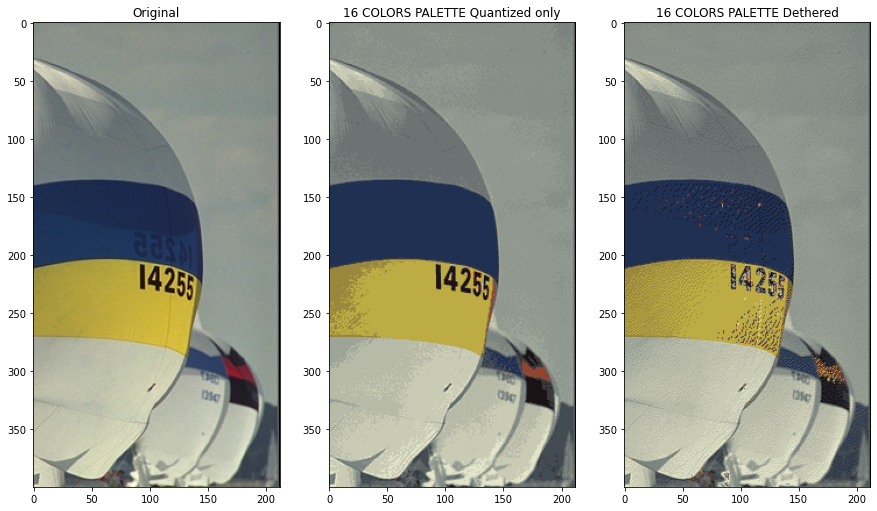

In [210]:
#GetApp: Going calculate KMeans for 16 colors and plot it
kmeans = KMeans(n_clusters=16).fit(np.reshape(img, (-1, 3)))
colors = kmeans.cluster_centers_
quanted16 = Quantize(colors);
dithered16 = Dethering(colors);
plt.subplot(131), plt.imshow(img[200:600, 300:600, :]), plt.title('Original')
plt.subplot(132), plt.imshow(quanted16[200:600, 300:600, :]), plt.title('16 COLORS PALETTE Quantized only')
plt.subplot(133), plt.imshow(dithered16[200:600, 300:600, :]), plt.title('16 COLORS PALETTE Dethered')


100%|██████████| 766/766 [01:11<00:00, 10.72it/s]


(<AxesSubplot:title={'center':'32 COLORS PALETTE Dethered'}>,
 Text(0.5, 1.0, '32 COLORS PALETTE Dethered'))

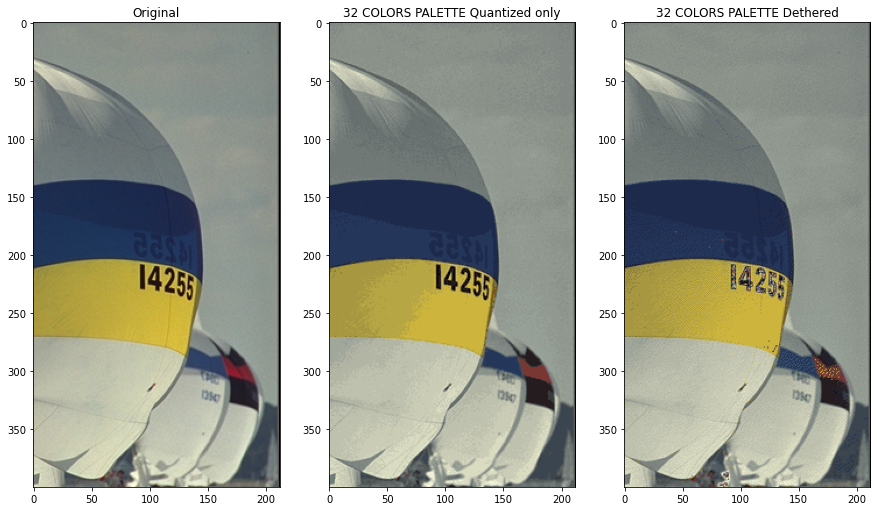

In [211]:
#GetApp: Going calculate KMeans for 32 colors and plot it
kmeans = KMeans(n_clusters=32).fit(np.reshape(img, (-1, 3)))
colors = kmeans.cluster_centers_
quanted32 = Quantize(colors);
dithered32 = Dethering(colors);
plt.subplot(131), plt.imshow(img[200:600, 300:600, :]), plt.title('Original')
plt.subplot(132), plt.imshow(quanted32[200:600, 300:600, :]), plt.title('32 COLORS PALETTE Quantized only')
plt.subplot(133), plt.imshow(dithered32[200:600, 300:600, :]), plt.title('32 COLORS PALETTE Dethered')

100%|██████████| 766/766 [07:09<00:00,  1.79it/s]


(<AxesSubplot:title={'center':'256 COLORS PALETTE Dethered'}>,
 Text(0.5, 1.0, '256 COLORS PALETTE Dethered'))

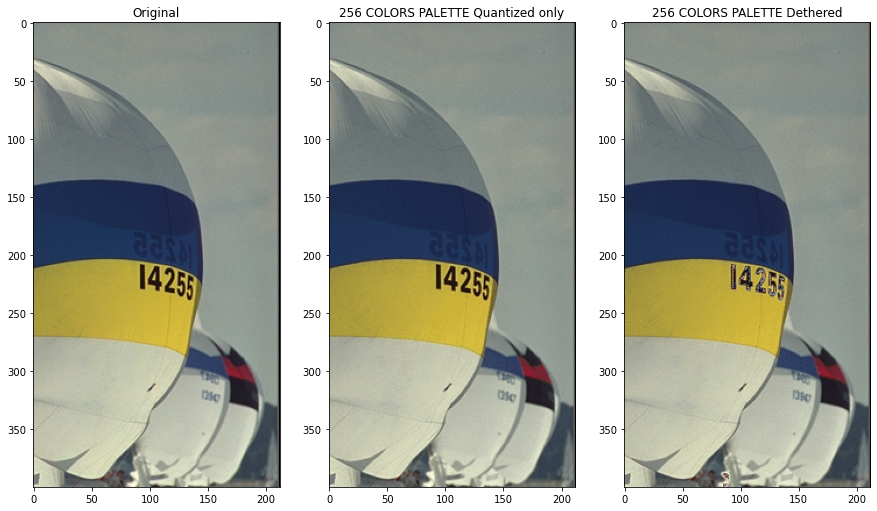

In [213]:
#GetApp: Going calculate KMeans for 256 colors and plot it
kmeans = KMeans(n_clusters=256).fit(np.reshape(img, (-1, 3)))
colors = kmeans.cluster_centers_
quanted256 = Quantize(colors);
dithered256 = Dethering(colors);
plt.subplot(131), plt.imshow(img[200:600, 300:600, :]), plt.title('Original')
plt.subplot(132), plt.imshow(quanted256[200:600, 300:600, :]), plt.title('256 COLORS PALETTE Quantized only')
plt.subplot(133), plt.imshow(dithered256[200:600, 300:600, :]), plt.title('256 COLORS PALETTE Dethered')

(<AxesSubplot:title={'center':'256 COLORS PALETTE Dethered'}>,
 Text(0.5, 1.0, '256 COLORS PALETTE Dethered'))

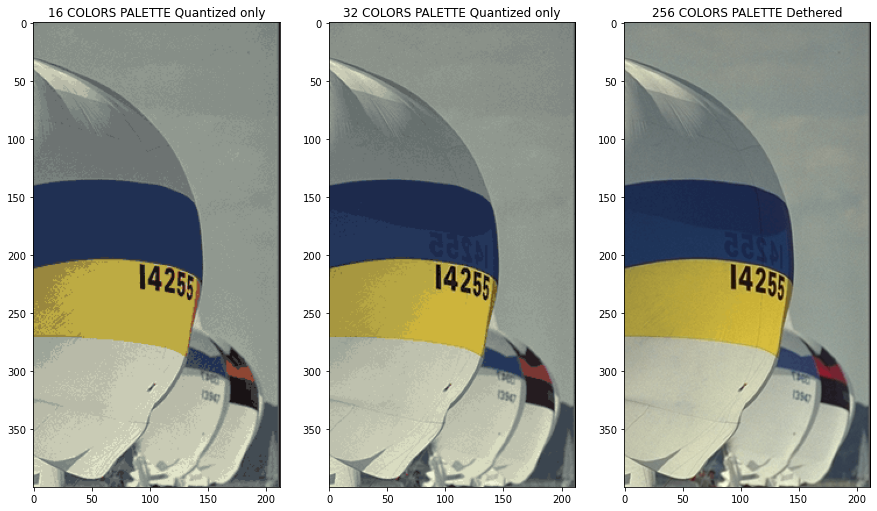

In [214]:
plt.subplot(131), plt.imshow(quanted16[200:600, 300:600, :]), plt.title('16 COLORS PALETTE Quantized only')
plt.subplot(132), plt.imshow(quanted32[200:600, 300:600, :]), plt.title('32 COLORS PALETTE Quantized only')
plt.subplot(133), plt.imshow(quanted256[200:600, 300:600, :]), plt.title('256 COLORS PALETTE Dethered')

(<AxesSubplot:title={'center':'256 COLORS PALETTE Dethered'}>,
 Text(0.5, 1.0, '256 COLORS PALETTE Dethered'))

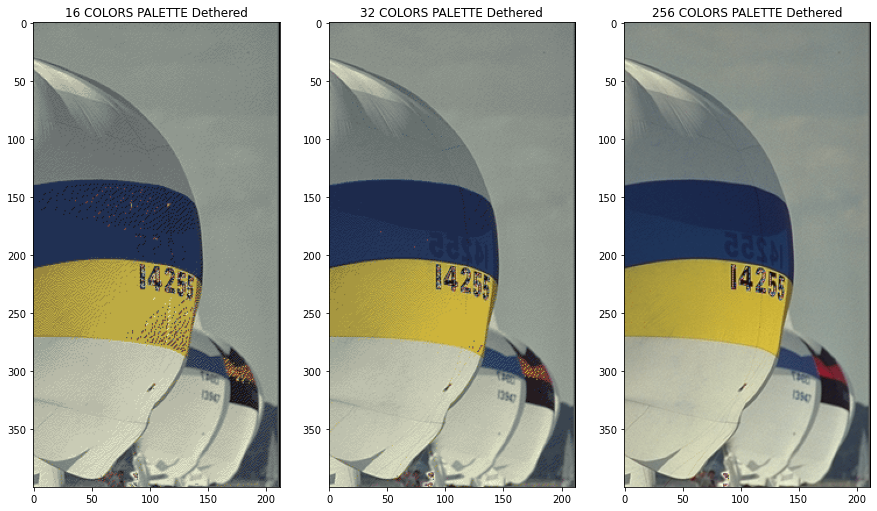

In [215]:
plt.subplot(131), plt.imshow(dithered16[200:600, 300:600, :]), plt.title('16 COLORS PALETTE Dethered')
plt.subplot(132), plt.imshow(dithered32[200:600, 300:600, :]), plt.title('32 COLORS PALETTE Dethered')
plt.subplot(133), plt.imshow(dithered256[200:600, 300:600, :]), plt.title('256 COLORS PALETTE Dethered')

Apply FS dithering the same way you did before.
* How does the result look like to you?
* What happens if we use 32 colours?
* And what happens if we use 256 colours?

1. With 16 colors it's looks more better than four gray colors. But not ideal, the lot of information is lost during quantisation.
2. With 32 palette colors, of course, the result is more better 16 but not enough for me.  
3. I went to drink coffee:) The KMeans color palette  calculations take lot of time. The palette with 256 colors is so much for this picture. The picture looks good after quantisation procedure, the dethering is not nessessary. I think the 64 palette colors will be optimal for this kind of picture.